In [145]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
train = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [2]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


# `groupby()`

In [4]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [7]:
drinks.groupby('continent').beer_servings.mean()
#drinks.groupby('continent').mean().beer_servings

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

# `stack()` and `unstack()`  

In [13]:
drinks.groupby('continent').beer_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [17]:
drinks.groupby('continent').beer_servings.describe().unstack()

       continent    
count  Africa            53.000000
       Asia              44.000000
       Europe            45.000000
       North America     23.000000
       Oceania           16.000000
       South America     12.000000
mean   Africa            61.471698
       Asia              37.045455
       Europe           193.777778
       North America    145.434783
       Oceania           89.687500
       South America    175.083333
std    Africa            80.557816
       Asia              49.469725
       Europe            99.631569
       North America     79.621163
       Oceania           96.641412
       South America     65.242845
min    Africa             0.000000
       Asia               0.000000
       Europe             0.000000
       North America      1.000000
       Oceania            0.000000
       South America     93.000000
25%    Africa            15.000000
       Asia               4.250000
       Europe           127.000000
       North America     80.000000

In [20]:
drinks.groupby('continent').beer_servings.describe().stack()

continent           
Africa         count     53.000000
               mean      61.471698
               std       80.557816
               min        0.000000
               25%       15.000000
               50%       32.000000
               75%       76.000000
               max      376.000000
Asia           count     44.000000
               mean      37.045455
               std       49.469725
               min        0.000000
               25%        4.250000
               50%       17.500000
               75%       60.500000
               max      247.000000
Europe         count     45.000000
               mean     193.777778
               std       99.631569
               min        0.000000
               25%      127.000000
               50%      219.000000
               75%      270.000000
               max      361.000000
North America  count     23.000000
               mean     145.434783
               std       79.621163
               min        1.000000

# MultiIndex 

In [26]:
df = pd.DataFrame({'name':['A','A','B','B'],'day':[1,2,1,2],'weight':[100,103,120,130],'height':[67,68,72,72]})
df

,name,day,weight,height
0,A,1,100,67
1,A,2,103,68
2,B,1,120,72
3,B,2,130,72


In [28]:
i = df.set_index(['name','day'])
i

weight  height
name day                
A    1       100      67
     2       103      68
B    1       120      72
     2       130      72

# `.to_panel()` & `.to_frame()`

In [30]:
i.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

# Detection of Outliers

In [31]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<AxesSubplot:>

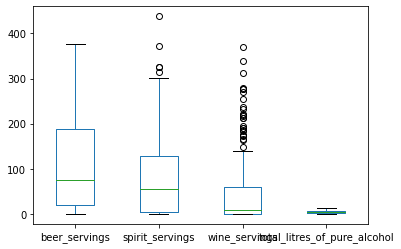

In [34]:
#%matplotlib inline
drinks.plot(kind='box')

# Filtering Rows

In [35]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [39]:
#movies[ movies.duration >= 200 ]
movies.loc[ movies.duration >= 200, : ]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [42]:
movies[ movies.duration >= 200 ].genre
#movies.loc[ movies.duration >= 200, 'genre' ]

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

# Filtering Rows & filling NEW VALUE

In [146]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [147]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [148]:
ufo.loc[(ufo.City.isna()) & (ufo['Colors Reported'] == 'RED'), 'City'] = 'New Value'

ufo.loc[ (ufo.City == 'New Value' ) & (ufo['Colors Reported'] == 'RED'), : ]

,City,Colors Reported,Shape Reported,State,Time
3123,New Value,RED,TRIANGLE,WV,1975-11-25 23:00:00
12441,New Value,RED,FIREBALL,WA,1998-10-26 17:58:00


In [177]:
ufo.iloc[0,0] = 'YESS'
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,YESS,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


# value_counts()

In [43]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [48]:
a = drinks.continent.value_counts()
a

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [49]:
b = drinks.continent.value_counts( normalize = True )
b

Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: continent, dtype: float64

In [51]:
pd.concat([a,b] , axis=1)

,continent,continent
Africa,53,0.274611
Europe,45,0.233161
Asia,44,0.227979
North America,23,0.119171
Oceania,16,0.082902
South America,12,0.062176


In [52]:
pd.concat([a,b] , axis=0)

Africa           53.000000
Europe           45.000000
Asia             44.000000
North America    23.000000
Oceania          16.000000
South America    12.000000
Africa            0.274611
Europe            0.233161
Asia              0.227979
North America     0.119171
Oceania           0.082902
South America     0.062176
Name: continent, dtype: float64

In [53]:
drinks.sum( axis=0 )

country                         AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer_servings                                                               20489
spirit_servings                                                             15632
wine_servings                                                                9544
total_litres_of_pure_alcohol                                                910.4
continent                       AsiaEuropeAfricaEuropeAfricaNorth AmericaSouth...
dtype: object

In [54]:
drinks.sum( axis=1 )

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
       ...  
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

# Non-numeric to Numeric

In [55]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [57]:
drinks['beer'] = drinks.beer_servings.astype(str)

In [60]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                             object
dtype: object

In [63]:
drinks['beer'] = drinks.beer.astype(int)

In [64]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                              int32
dtype: object

# Mapping

### 1 Column 

In [65]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [66]:
mapping = { 'R':'no', 'PG-13':'yes', 'PG':'yes', 'G':'yes' }

In [68]:
movies['content_rating_mapping'] = movies.content_rating.map(mapping)

In [69]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,content_rating_mapping
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",no
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",no
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",no
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",yes
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",no


### 2 Column

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
mapping = { True : '1', False : '0' }

In [123]:
train['new'] = ((train.Sex == 'male') & (train.Age < 30)).map(mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Merging

In [86]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [87]:
mapping2 = pd.DataFrame({ 'ratings':['R', 'PG-13'], 'kids':['no', 'yes'] })
mapping2

,ratings,kids
0,R,no
1,PG-13,yes


In [88]:
mapping2.set_index('ratings', inplace = True)
mapping2

,kids
ratings,
R,no
PG-13,yes


In [90]:
#x = pd.merge( movies, mapping2, left_on='content_rating', right_on = 'ratings' )
x = pd.merge( movies, mapping2, left_on='content_rating', right_index = True )
x

,star_rating,title,content_rating,genre,duration,actors_list,kids
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",no
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",no
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",no
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",no
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",no
...,...,...,...,...,...,...,...
964,7.4,Lincoln,PG-13,Biography,150,"[u'Daniel Day-Lewis', u'Sally Field', u'David ...",yes
965,7.4,Limitless,PG-13,Mystery,105,"[u'Bradley Cooper', u'Anna Friel', u'Abbie Cor...",yes
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy...",yes
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha...",yes


# Remove last 30 rows

In [92]:
ufo.shape

(18241, 5)

In [93]:
list1 = [1,2,3,4,5,6,7,8]
list1[:-3]

[1, 2, 3, 4, 5]

In [95]:
ufo.iloc[ :-30, : ].shape

(18211, 5)

# datetime

In [96]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [97]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [98]:
ufo['year'] = ufo.Time.dt.year.astype(str)

In [110]:
ufo['month'] = ufo.Time.dt.month.astype(str).str.pad(width=2,fillchar='0')

In [113]:
ufo['year-month'] = ufo.year.str.cat(ufo.month, sep='-')

In [150]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


# `%time` & `%timeit `

In [158]:
%time pd.DataFrame({ 'ratings':['R', 'PG-13'], 'kids':['no', 'yes'] })

Wall time: 997 µs


,ratings,kids
0,R,no
1,PG-13,yes


In [159]:
%timeit pd.DataFrame({ 'ratings':['R', 'PG-13'], 'kids':['no', 'yes'] })

467 µs ± 56.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# matplotlib

In [160]:
%matplotlib inline  # .pynb notebook

In [161]:
import matplotlib.pyplot as plt

plt.show() # any IDE

# Compare 2 DataFrame

In [169]:
drinks1 = pd.read_csv('http://bit.ly/drinksbycountry')

In [170]:
drinks2 = pd.read_csv('http://bit.ly/drinksbycountry')

In [171]:
drinks1 == drinks2

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
188,True,True,True,True,True,True
189,True,True,True,True,True,True
190,True,True,True,True,True,True
191,True,True,True,True,True,True


In [176]:
(drinks1!= drinks2).sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Filtering on Categories

In [178]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [179]:
drinks[drinks.continent.isin(['Asia', 'Africa'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
12,Bahrain,42,63,7,2.0,Asia
13,Bangladesh,0,0,0,0.0,Asia
...,...,...,...,...,...,...
186,Uzbekistan,25,101,8,2.4,Asia
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [180]:
drinks[~drinks.continent.isin(['Asia', 'Africa'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,Europe
184,USA,249,158,84,8.7,North America
185,Uruguay,115,35,220,6.6,South America
187,Vanuatu,21,18,11,0.9,Oceania


# `.describe()`

In [181]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [182]:
drinks.beer_servings.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [183]:
drinks.continent.describe()

count        193
unique         6
top       Africa
freq          53
Name: continent, dtype: object

# Convert boolean to int

In [184]:
drinks.continent == 'Asia'

0       True
1      False
2      False
3      False
4      False
       ...  
188    False
189     True
190     True
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [185]:
(drinks.continent == 'Asia').astype(int)

0      1
1      0
2      0
3      0
4      0
      ..
188    0
189    1
190    1
191    0
192    0
Name: continent, Length: 193, dtype: int32